In [1306]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
plt.style.use({'figure.figsize':(16, 9)})

In [1307]:
data = pd.read_csv('olist_public_dataset.csv')

In [1308]:
data.head()

,Unnamed: 0,id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,...,customer_zip_code_prefix,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,1,delivered,79.00,17.80,1,1,2017-11-08 13:19:33.000000,2017-11-08 13:35:57.410228,2017-12-06 00:00:00.000000,...,728,papelaria,50,201,2,5,NaN,NaN,2017-11-24 00:00:00.000000,2017-11-25 11:18:22+00:00
1,1,2,delivered,119.90,27.16,1,1,2017-08-07 11:23:16.000000,2017-08-07 12:03:17.259618,2017-08-29 00:00:00.000000,...,892,market_place,50,511,3,5,NaN,NaN,2017-08-18 00:00:00.000000,2017-08-20 03:31:34+00:00
2,2,3,delivered,519.99,41.69,1,1,2018-03-22 02:29:42.000000,2018-03-22 03:09:06.550715,2018-04-19 00:00:00.000000,...,291,esporte_lazer,48,1156,2,1,NaN,produto veio quebrado e usado foi retirado de ...,2018-04-16 00:00:00.000000,2018-04-19 02:13:22+00:00
3,3,4,delivered,29.50,17.92,1,1,2017-09-14 21:51:28.000000,2017-09-14 22:08:10.626382,2017-10-06 00:00:00.000000,...,222,esporte_lazer,21,207,2,4,NaN,produto entregue como esperado,2017-10-04 00:00:00.000000,2017-10-04 20:07:28+00:00
4,4,5,delivered,26.77,23.11,1,1,2018-03-03 20:50:21.000000,2018-03-03 21:31:21.320960,2018-03-15 00:00:00.000000,...,40,cama_mesa_banho,41,451,1,5,NaN,produto de acordo com o pedido e entregue ante...,2018-03-07 00:00:00.000000,2018-03-08 00:23:26+00:00


In [1309]:
data.order_status.unique()

array(['delivered', 'shipped', 'invoiced', 'canceled', 'processing',
       'unavailable'], dtype=object)

In [1310]:
data.customer_state.unique().shape

(27,)

In [1311]:
data.product_category_name.unique().shape

(72,)

In [1312]:
data.drop(['review_comment_title','Unnamed: 0','id','review_comment_message','customer_zip_code_prefix'],axis=1,inplace=True)

In [1313]:
data = data.dropna()

In [1314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97616 entries, 0 to 99999
Data columns (total 18 columns):
order_status                     97616 non-null object
order_products_value             97616 non-null float64
order_freight_value              97616 non-null float64
order_items_qty                  97616 non-null int64
order_sellers_qty                97616 non-null int64
order_purchase_timestamp         97616 non-null object
order_aproved_at                 97616 non-null object
order_estimated_delivery_date    97616 non-null object
order_delivered_customer_date    97616 non-null object
customer_city                    97616 non-null object
customer_state                   97616 non-null object
product_category_name            97616 non-null object
product_name_lenght              97616 non-null int64
product_description_lenght       97616 non-null int64
product_photos_qty               97616 non-null int64
review_score                     97616 non-null int64
review_creation

In [1315]:
time_col = [s for s in data.columns if (('_date' in s) or ('_timestamp' in s)) or ('order_aproved_at' in s)]
print(time_col)

['order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'review_creation_date', 'review_answer_timestamp']


In [1316]:
for i in time_col:
    data[i] = pd.to_datetime(data[i])

# day

Text(0.5,1,'Sales per day')

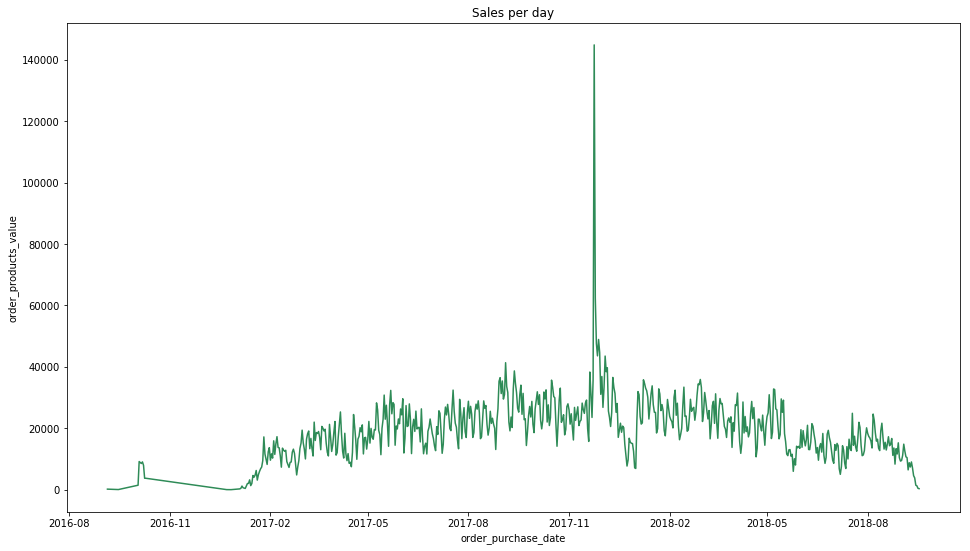

In [1317]:
data['order_purchase_date'] = data.order_purchase_timestamp.dt.date
sales_per_purchase_date = data.groupby('order_purchase_date', as_index=False).order_products_value.sum()
ax = sns.lineplot(x="order_purchase_date", y="order_products_value", data=sales_per_purchase_date,color='seagreen')
ax.set_title('Sales per day')

Text(0.5,1,'Order per day')

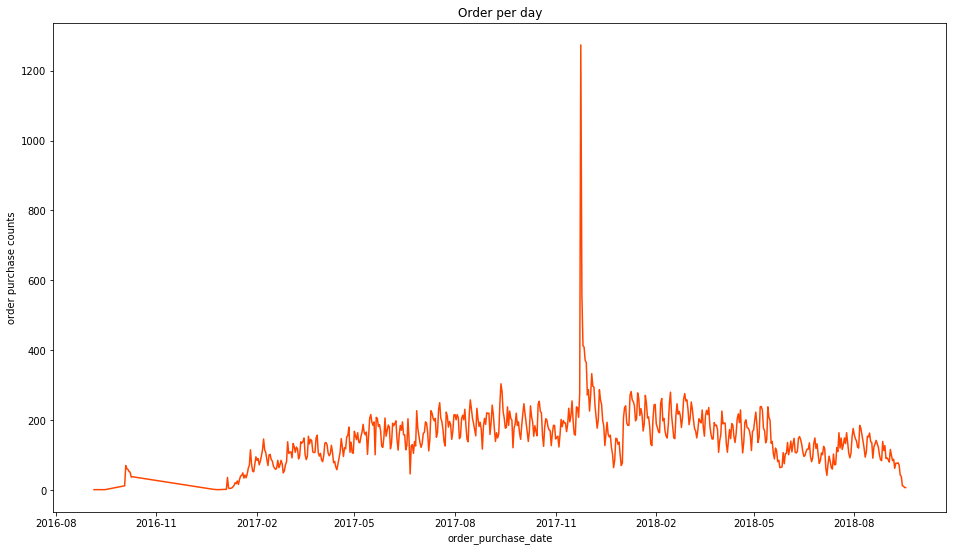

In [1318]:
data['order_purchase_date'] = data.order_purchase_timestamp.dt.date
order_counts_per_date = data.groupby('order_purchase_date',as_index=False).order_status.count()
ax = sns.lineplot(x="order_purchase_date", y="order_status", data=order_counts_per_date,color='orangered')
ax.set_ylabel('order purchase counts')
ax.set_title('Order per day')

Text(0.5,1,'order items qty per day')

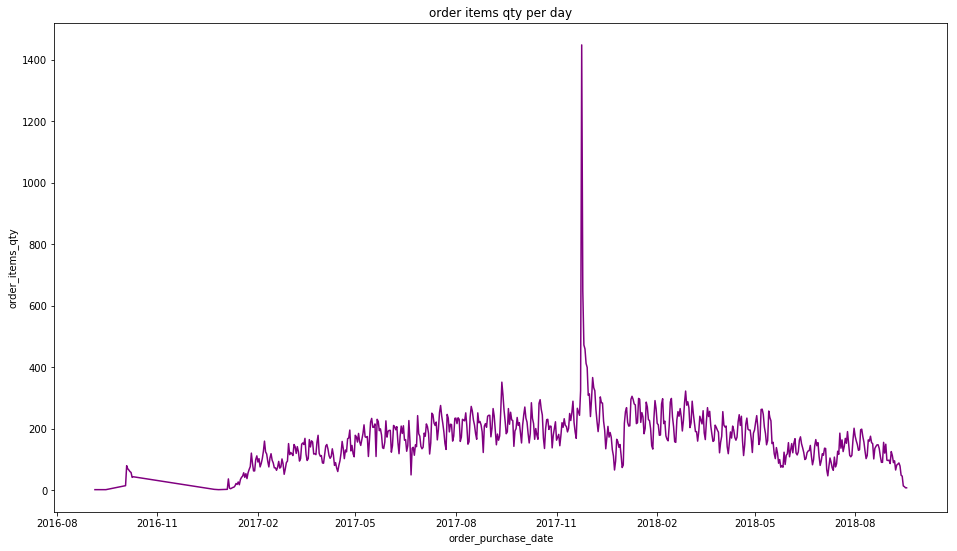

In [1319]:
data['order_items_qty_date'] = data.order_purchase_timestamp.dt.date
order_items_qty_date = data.groupby('order_purchase_date', as_index=False).order_items_qty.sum()
ax = sns.lineplot(x="order_purchase_date", y="order_items_qty", data=order_items_qty_date,color='purple')
ax.set_title('order items qty per day')

# week

Text(0.5,1,'Sales per week')

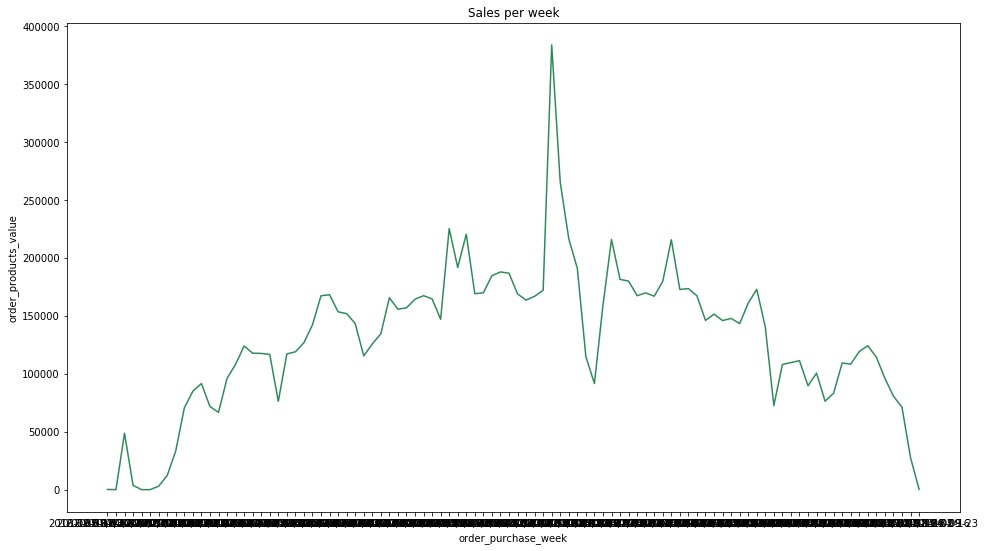

In [1320]:
data['order_purchase_week'] = data.order_purchase_timestamp.dt.to_period('W').astype(str)
sales_per_purchase_week = data.groupby('order_purchase_week', as_index=False).order_products_value.sum()
ax = sns.lineplot(x="order_purchase_week", y="order_products_value", data=sales_per_purchase_week,color='seagreen')
ax.set_title('Sales per week')

Text(0,0.5,'order per week')

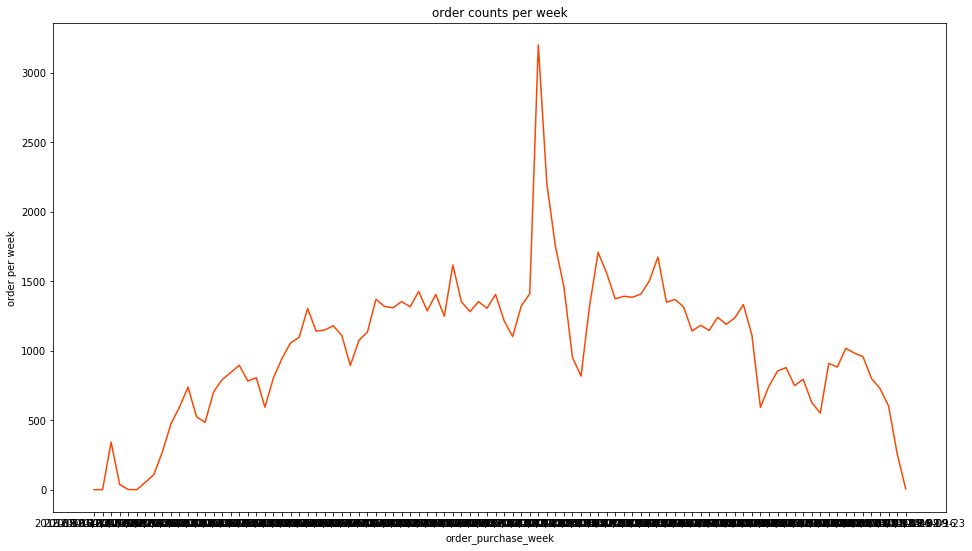

In [1321]:
data['order_purchase_week'] = data.order_purchase_timestamp.dt.to_period('W').astype(str)
order_counts_per_week = data.groupby('order_purchase_week', as_index=False).order_status.count()
ax = sns.lineplot(x="order_purchase_week", y="order_status", data=order_counts_per_week,color='orangered')
ax.set_title('order counts per week')
ax.set_ylabel('order per week')

Text(0.5,1,'order items qty per week')

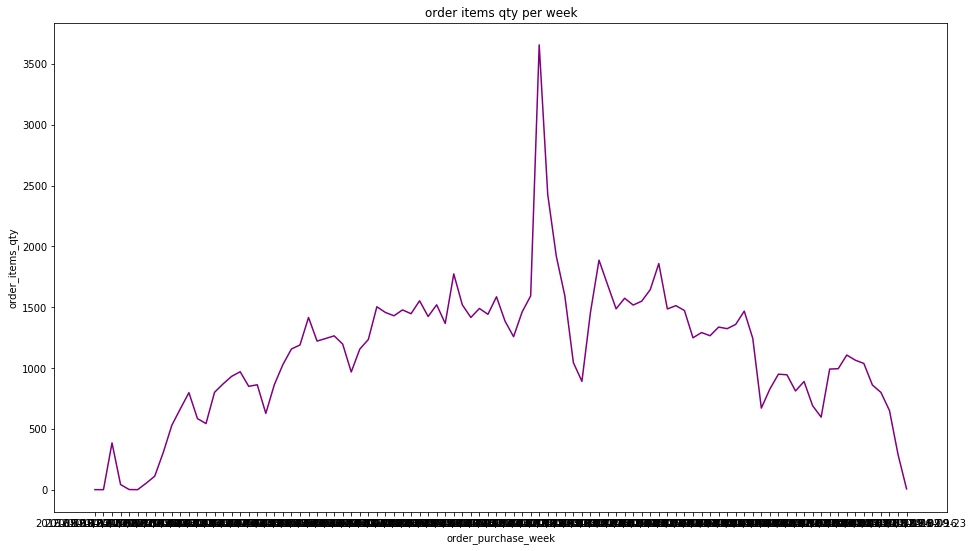

In [1322]:
data['order_items_qty_week'] = data.order_purchase_timestamp.dt.to_period('W').astype(str)
order_items_qty_week = data.groupby('order_purchase_week', as_index=False).order_items_qty.sum()
ax = sns.lineplot(x="order_purchase_week", y="order_items_qty", data=order_items_qty_week,color='purple')
ax.set_title('order items qty per week')

# review score

In [1323]:
data.head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,...,product_name_lenght,product_description_lenght,product_photos_qty,review_score,review_creation_date,review_answer_timestamp,order_purchase_date,order_items_qty_date,order_purchase_week,order_items_qty_week
0,delivered,79.00,17.80,1,1,2017-11-08 13:19:33,2017-11-08 13:35:57.410228,2017-12-06,2017-11-23 21:21:25.174743,Luziania,...,50,201,2,5,2017-11-24,2017-11-25 11:18:22,2017-11-08,2017-11-08,2017-11-06/2017-11-12,2017-11-06/2017-11-12
1,delivered,119.90,27.16,1,1,2017-08-07 11:23:16,2017-08-07 12:03:17.259618,2017-08-29,2017-08-17 19:49:48.177022,Joinville,...,50,511,3,5,2017-08-18,2017-08-20 03:31:34,2017-08-07,2017-08-07,2017-08-07/2017-08-13,2017-08-07/2017-08-13
2,delivered,519.99,41.69,1,1,2018-03-22 02:29:42,2018-03-22 03:09:06.550715,2018-04-19,2018-04-15 17:56:41.889191,Serra,...,48,1156,2,1,2018-04-16,2018-04-19 02:13:22,2018-03-22,2018-03-22,2018-03-19/2018-03-25,2018-03-19/2018-03-25
3,delivered,29.50,17.92,1,1,2017-09-14 21:51:28,2017-09-14 22:08:10.626382,2017-10-06,2017-10-03 13:13:19.786175,RIO DE JANEIRO,...,21,207,2,4,2017-10-04,2017-10-04 20:07:28,2017-09-14,2017-09-14,2017-09-11/2017-09-17,2017-09-11/2017-09-17
4,delivered,26.77,23.11,1,1,2018-03-03 20:50:21,2018-03-03 21:31:21.320960,2018-03-15,2018-03-06 16:41:56.095195,Sao Paulo,...,41,451,1,5,2018-03-07,2018-03-08 00:23:26,2018-03-03,2018-03-03,2018-02-26/2018-03-04,2018-02-26/2018-03-04


day

In [1324]:
data['review_date'] = data['review_creation_date'].dt.date

Text(0.5,1,'average review score per day')

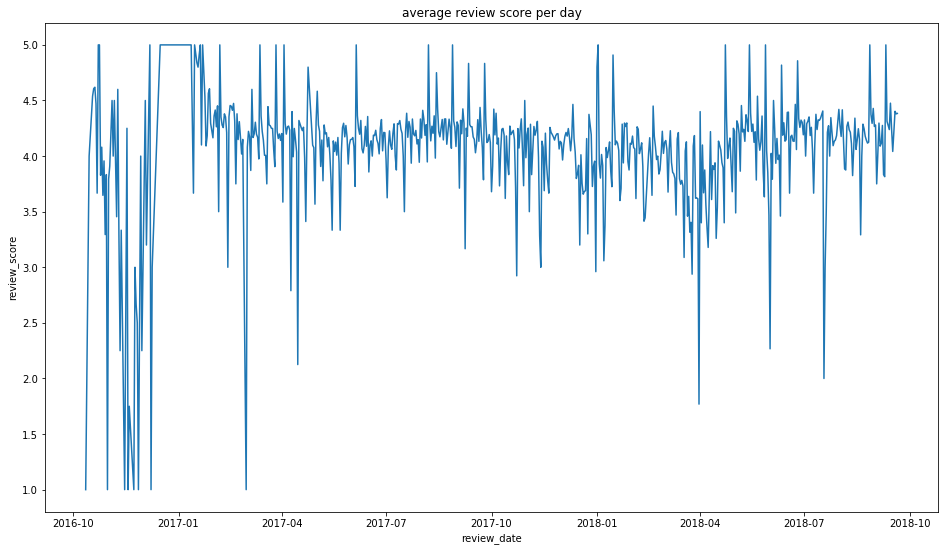

In [1325]:
avg_review_score_date = data.groupby('review_date',as_index=False).review_score.mean()
ax = sns.lineplot(x='review_date',y='review_score',data=avg_review_score_date)
ax.set_title('average review score per day')

week

Text(0.5,1,'average review score per week')

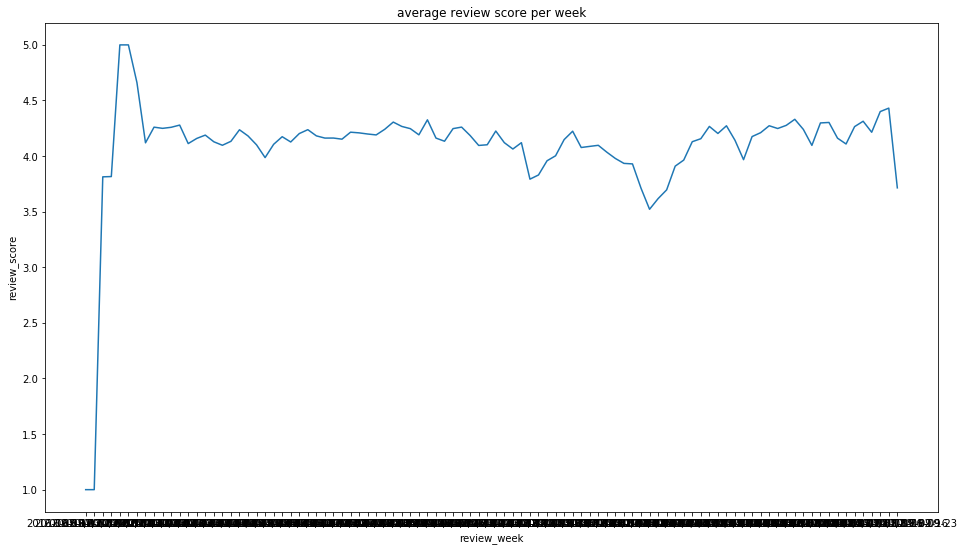

In [1326]:
data['review_week'] = data.order_purchase_timestamp.dt.to_period('W').astype(str)
avg_review_score_week = data.groupby('review_week',as_index=False).review_score.mean()
ax = sns.lineplot(x='review_week',y='review_score',data=avg_review_score_week)
ax.set_title('average review score per week')

#客单价

Text(0,0.5,'avg values/order')

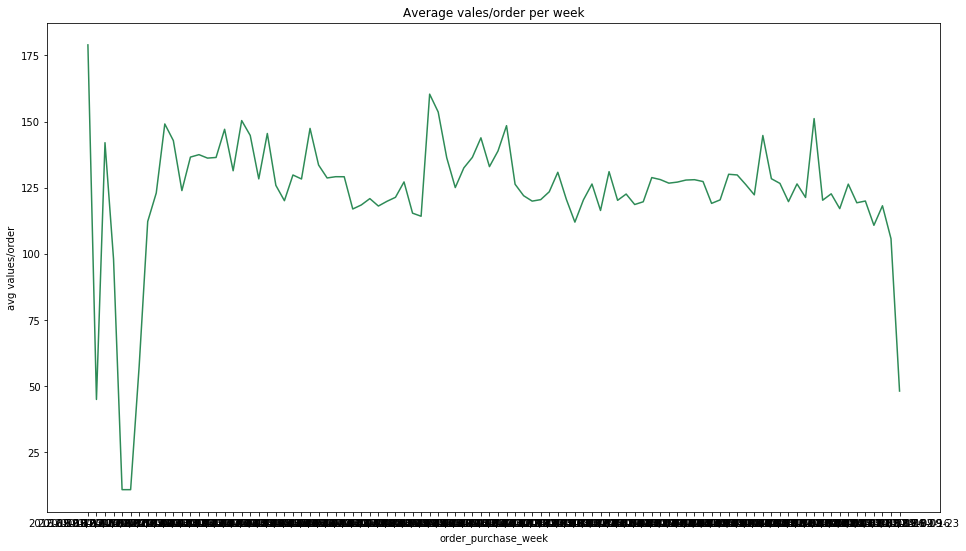

In [1327]:
data['order_purchase_week'] = data.order_purchase_timestamp.dt.to_period('W').astype(str)
avg_sales_per_purchase_week = data.groupby('order_purchase_week', as_index=False).order_products_value.mean()
ax = sns.lineplot(x="order_purchase_week", y="order_products_value", data=avg_sales_per_purchase_week,color='seagreen')
ax.set_title('Average vales/order per week')
ax.set_ylabel('avg values/order')

#每周运费占比情况

Text(0.5,1,'Freight/sales per week')

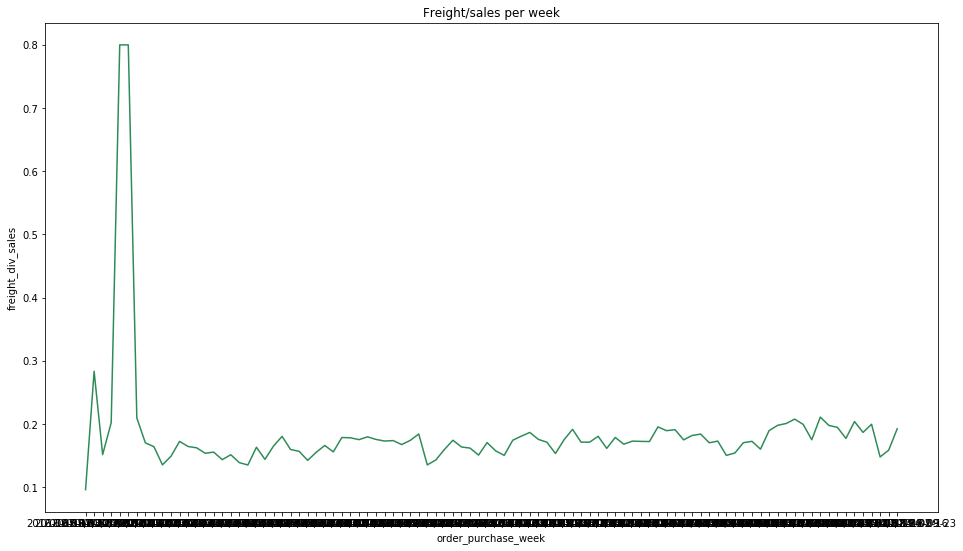

In [1328]:
data['order_purchase_week'] = data.order_purchase_timestamp.dt.to_period('W').astype(str)
sales_per_purchase_week = data.groupby('order_purchase_week', as_index=False).order_products_value.mean()
order_freight_value_week = data.groupby('order_purchase_week', as_index=False).order_freight_value.mean()
freight_div_sales = pd.concat([sales_per_purchase_week['order_purchase_week'],
                            (order_freight_value_week['order_freight_value']/sales_per_purchase_week['order_products_value'])],
                              axis=1)
freight_div_sales.columns = ['order_purchase_week','freight_div_sales']
ax = sns.lineplot(x="order_purchase_week", y="freight_div_sales", data=freight_div_sales,color='seagreen')
ax.set_title('Freight/sales per week')

In [1329]:
data.head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,...,product_photos_qty,review_score,review_creation_date,review_answer_timestamp,order_purchase_date,order_items_qty_date,order_purchase_week,order_items_qty_week,review_date,review_week
0,delivered,79.00,17.80,1,1,2017-11-08 13:19:33,2017-11-08 13:35:57.410228,2017-12-06,2017-11-23 21:21:25.174743,Luziania,...,2,5,2017-11-24,2017-11-25 11:18:22,2017-11-08,2017-11-08,2017-11-06/2017-11-12,2017-11-06/2017-11-12,2017-11-24,2017-11-06/2017-11-12
1,delivered,119.90,27.16,1,1,2017-08-07 11:23:16,2017-08-07 12:03:17.259618,2017-08-29,2017-08-17 19:49:48.177022,Joinville,...,3,5,2017-08-18,2017-08-20 03:31:34,2017-08-07,2017-08-07,2017-08-07/2017-08-13,2017-08-07/2017-08-13,2017-08-18,2017-08-07/2017-08-13
2,delivered,519.99,41.69,1,1,2018-03-22 02:29:42,2018-03-22 03:09:06.550715,2018-04-19,2018-04-15 17:56:41.889191,Serra,...,2,1,2018-04-16,2018-04-19 02:13:22,2018-03-22,2018-03-22,2018-03-19/2018-03-25,2018-03-19/2018-03-25,2018-04-16,2018-03-19/2018-03-25
3,delivered,29.50,17.92,1,1,2017-09-14 21:51:28,2017-09-14 22:08:10.626382,2017-10-06,2017-10-03 13:13:19.786175,RIO DE JANEIRO,...,2,4,2017-10-04,2017-10-04 20:07:28,2017-09-14,2017-09-14,2017-09-11/2017-09-17,2017-09-11/2017-09-17,2017-10-04,2017-09-11/2017-09-17
4,delivered,26.77,23.11,1,1,2018-03-03 20:50:21,2018-03-03 21:31:21.320960,2018-03-15,2018-03-06 16:41:56.095195,Sao Paulo,...,1,5,2018-03-07,2018-03-08 00:23:26,2018-03-03,2018-03-03,2018-02-26/2018-03-04,2018-02-26/2018-03-04,2018-03-07,2018-02-26/2018-03-04


# feature enginnering

In [1331]:
data.head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,...,product_photos_qty,review_score,review_creation_date,review_answer_timestamp,order_purchase_date,order_items_qty_date,order_purchase_week,order_items_qty_week,review_date,review_week
0,delivered,79.00,17.80,1,1,2017-11-08 13:19:33,2017-11-08 13:35:57.410228,2017-12-06,2017-11-23 21:21:25.174743,Luziania,...,2,5,2017-11-24,2017-11-25 11:18:22,2017-11-08,2017-11-08,2017-11-06/2017-11-12,2017-11-06/2017-11-12,2017-11-24,2017-11-06/2017-11-12
1,delivered,119.90,27.16,1,1,2017-08-07 11:23:16,2017-08-07 12:03:17.259618,2017-08-29,2017-08-17 19:49:48.177022,Joinville,...,3,5,2017-08-18,2017-08-20 03:31:34,2017-08-07,2017-08-07,2017-08-07/2017-08-13,2017-08-07/2017-08-13,2017-08-18,2017-08-07/2017-08-13
2,delivered,519.99,41.69,1,1,2018-03-22 02:29:42,2018-03-22 03:09:06.550715,2018-04-19,2018-04-15 17:56:41.889191,Serra,...,2,1,2018-04-16,2018-04-19 02:13:22,2018-03-22,2018-03-22,2018-03-19/2018-03-25,2018-03-19/2018-03-25,2018-04-16,2018-03-19/2018-03-25
3,delivered,29.50,17.92,1,1,2017-09-14 21:51:28,2017-09-14 22:08:10.626382,2017-10-06,2017-10-03 13:13:19.786175,RIO DE JANEIRO,...,2,4,2017-10-04,2017-10-04 20:07:28,2017-09-14,2017-09-14,2017-09-11/2017-09-17,2017-09-11/2017-09-17,2017-10-04,2017-09-11/2017-09-17
4,delivered,26.77,23.11,1,1,2018-03-03 20:50:21,2018-03-03 21:31:21.320960,2018-03-15,2018-03-06 16:41:56.095195,Sao Paulo,...,1,5,2018-03-07,2018-03-08 00:23:26,2018-03-03,2018-03-03,2018-02-26/2018-03-04,2018-02-26/2018-03-04,2018-03-07,2018-02-26/2018-03-04


customer_state

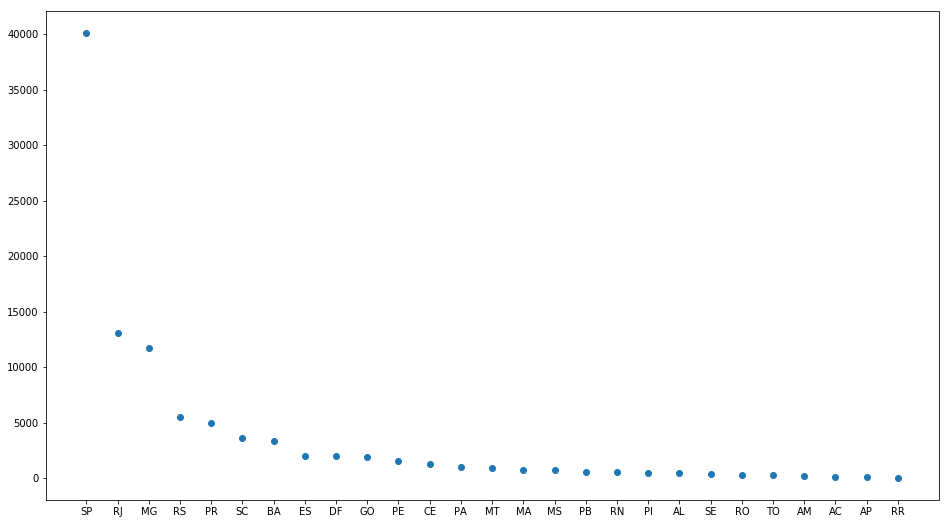

In [1332]:
plt.scatter(data['customer_state'].value_counts().index.values,data['customer_state'].value_counts())

In [1333]:
data['customer_state'].value_counts()

SP    40119
RJ    13048
MG    11744
RS     5487
PR     4918
SC     3654
BA     3383
ES     2028
DF     2015
GO     1927
PE     1558
CE     1291
PA      995
MT      908
MA      746
MS      701
PB      533
RN      506
PI      431
AL      418
SE      321
RO      284
TO      254
AM      152
AC       84
AP       66
RR       45
Name: customer_state, dtype: int64

In [1334]:
customer_state = dict(zip(*np.unique(data['customer_state'], return_counts=True)))
data['customer_state'] = data['customer_state'].apply(lambda x: 'OTHER' if customer_state[x] < 1000 else x)

cs = pd.get_dummies(data['customer_state'],prefix='customer_state')
data = pd.concat((data,cs),axis=1)
data.drop(['customer_state'],axis=1,inplace=True)

product_category_name

In [1336]:
data['product_category_name'].value_counts()

cama_mesa_banho                       10282
beleza_saude                           7785
moveis_decoracao                       7638
esporte_lazer                          7624
relogios_presentes                     6889
informatica_acessorios                 6126
utilidades_domesticas                  6065
ferramentas_jardim                     4539
cool_stuff                             4238
brinquedos                             3972
perfumaria                             3711
automotivo                             3159
telefonia                              3003
fashion_bolsas_e_acessorios            2689
bebes                                  2304
papelaria                              1947
pet_shop                               1834
moveis_escritorio                      1683
eletronicos                            1643
consoles_games                         1039
malas_acessorios                       1036
eletrodomesticos                        882
eletroportateis                 

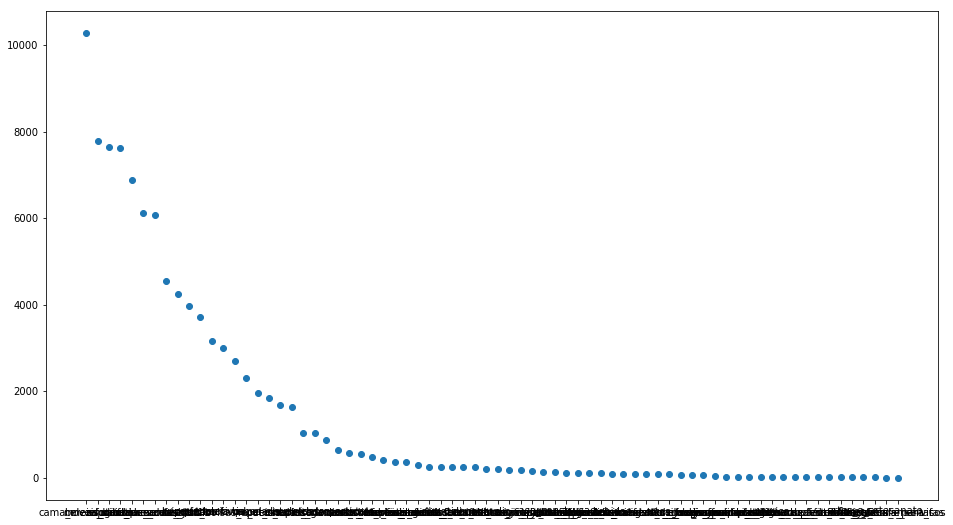

In [1337]:
plt.scatter(data['product_category_name'].value_counts().index.values,data['product_category_name'].value_counts())

In [1338]:
product_category_name = dict(zip(*np.unique(data['product_category_name'], return_counts=True)))
data['product_category_name'] = data['product_category_name'].apply(lambda x: 'OTHER' if product_category_name[x] < 2000 else x)

pcn = pd.get_dummies(data['product_category_name'],prefix='product_category_name')
data = pd.concat((data,pcn),axis=1)
data.drop(['product_category_name'],axis=1,inplace=True)

product_name_lenght

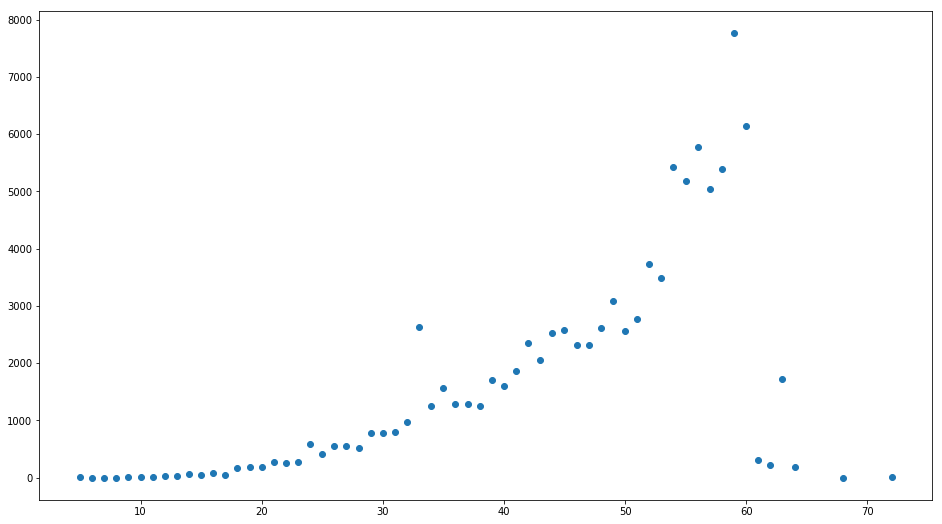

In [1340]:
plt.scatter(data['product_name_lenght'].value_counts().index.values,data['product_name_lenght'].value_counts())

In [1341]:
def get_nameLength(dt):
    if (dt>=10) & (dt < 20):
        return '20'
    elif (dt>=20) & (dt<30):
        return '30'
    elif (dt>=30) & (dt<40):
        return '40'
    elif (dt>=40) & (dt<50):
        return '50'
    elif (dt>=50) & (dt<60):
        return '60'
    elif (dt>=60) & (dt<70):
        return '70'
    else:
        return 'others'

In [1342]:
data['product_name_lenght_new'] = np.array([get_nameLength(x) for x in data['product_name_lenght']])
pnl = pd.get_dummies(data['product_name_lenght_new'],prefix='product_name_lenght')
data = pd.concat((data,pnl),axis=1)
data.drop(['product_name_lenght','product_name_lenght_new'],axis=1,inplace=True)

product_description_lenght

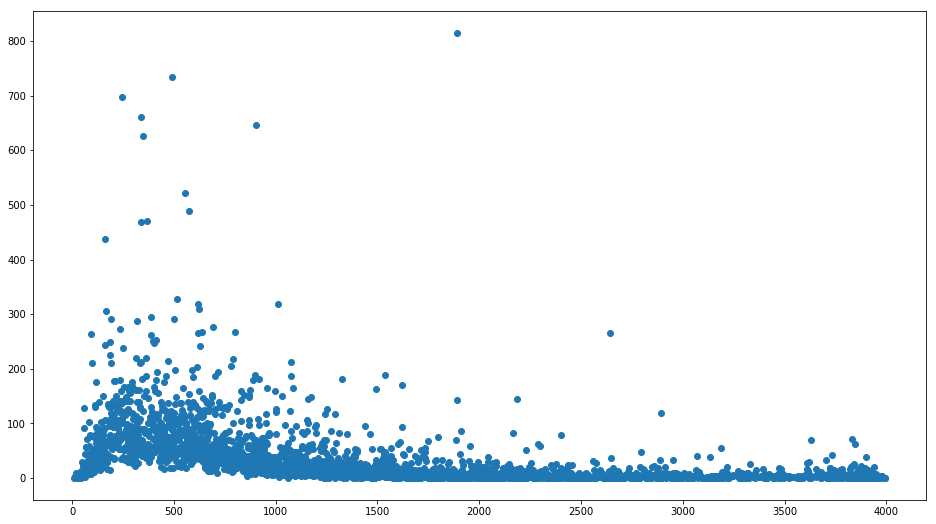

In [1343]:
plt.scatter(data['product_description_lenght'].value_counts().index.values,data['product_description_lenght'].value_counts())

In [1344]:
def get_descriptionLength(dt):
    if (dt>=0) & (dt < 1000):
        return '1000'
    elif (dt>=1000) & (dt<2000):
        return '2000'
    elif (dt>=2000) & (dt<3000):
        return '3000'
    elif (dt>=3000) & (dt<4000):
        return '4000'
    else:
        return 'others'

In [1345]:
data['product_description_lenght_new'] = np.array([get_descriptionLength(x) for x in data['product_description_lenght']])
pnl = pd.get_dummies(data['product_description_lenght_new'],prefix='product_description_lenght')
data = pd.concat((data,pnl),axis=1)
data.drop(['product_description_lenght','product_description_lenght_new'],axis=1,inplace=True)

In [1346]:
data.head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,...,product_name_lenght_30,product_name_lenght_40,product_name_lenght_50,product_name_lenght_60,product_name_lenght_70,product_name_lenght_others,product_description_lenght_1000,product_description_lenght_2000,product_description_lenght_3000,product_description_lenght_4000
0,delivered,79.00,17.80,1,1,2017-11-08 13:19:33,2017-11-08 13:35:57.410228,2017-12-06,2017-11-23 21:21:25.174743,Luziania,...,0,0,0,1,0,0,1,0,0,0
1,delivered,119.90,27.16,1,1,2017-08-07 11:23:16,2017-08-07 12:03:17.259618,2017-08-29,2017-08-17 19:49:48.177022,Joinville,...,0,0,0,1,0,0,1,0,0,0
2,delivered,519.99,41.69,1,1,2018-03-22 02:29:42,2018-03-22 03:09:06.550715,2018-04-19,2018-04-15 17:56:41.889191,Serra,...,0,0,1,0,0,0,0,1,0,0
3,delivered,29.50,17.92,1,1,2017-09-14 21:51:28,2017-09-14 22:08:10.626382,2017-10-06,2017-10-03 13:13:19.786175,RIO DE JANEIRO,...,1,0,0,0,0,0,1,0,0,0
4,delivered,26.77,23.11,1,1,2018-03-03 20:50:21,2018-03-03 21:31:21.320960,2018-03-15,2018-03-06 16:41:56.095195,Sao Paulo,...,0,0,1,0,0,0,1,0,0,0


Freight/sales

In [1347]:
data['freight_div_sales'] = np.true_divide(data['order_freight_value'].values,data['order_products_value'].values)

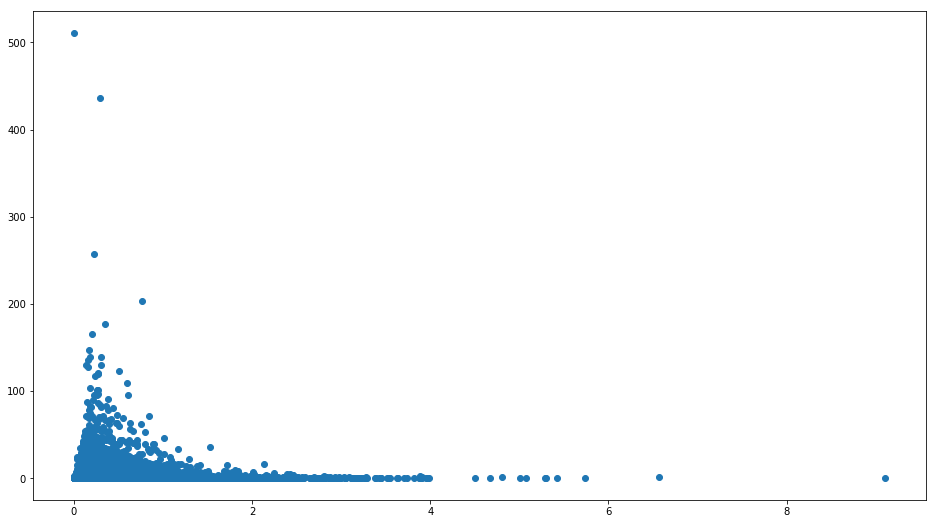

In [1348]:
plt.scatter(data['freight_div_sales'].value_counts().index.values,data['freight_div_sales'].value_counts())

In [1349]:
def getFreightDivSales(dt):
    if dt == 0:
        return '0'
    elif (dt>0) & (dt<0.25):
        return '25%'
    elif (dt>=0.25) & (dt<0.5):
        return '50%'
    elif (dt>=0.5) & (dt<0.75):
        return '75%'
    elif (dt>=0.75) & (dt<1):
        return '100%'
    else:
        return 'more than 100%'

In [1350]:
data['freight_div_sales_new'] = np.array([getFreightDivSales(x) for x in data['freight_div_sales']])
fds = pd.get_dummies(data['freight_div_sales_new'],prefix='freight_div_sales')
data = pd.concat((data,fds),axis=1)
data.drop(['freight_div_sales','freight_div_sales_new'],axis=1,inplace=True)

Time span(order_delivered_customer_date - order_purchase_timestamp)

In [1351]:
time_span_odcd_opt = data['order_delivered_customer_date'].subtract(data['order_purchase_timestamp']).dt.days

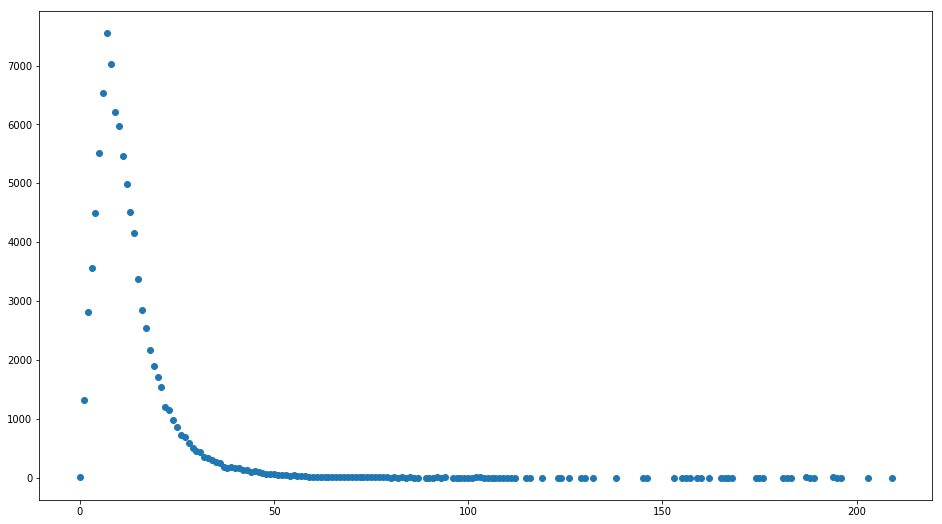

In [1352]:
plt.scatter(time_span_odcd_opt.value_counts().index.values,time_span_odcd_opt.value_counts())

In [1353]:
def get_time_span_odcd_opt(dt):
    if (dt <= 7) & (dt >= 0):
        return 'OneWeek'
    elif (dt <= 14) & (dt > 7):
        return 'TwoWeeks'
    elif (dt <= 21) & (dt > 14):
        return 'ThreeWeeks'
    elif (dt <= 28) & (dt > 21):
        return 'FourWeeks'
    elif (dt <= 35) & (dt > 28):
        return 'FiveWeeks'
    elif (dt <= 42) & (dt > 35):
        return 'SixWeeks'
    elif (dt <= 48) & (dt > 42):
        return 'SevenWeeks'
    else:
        return 'More than sevenweeks'

In [1354]:
data['time_span_odcd_opt'] = np.array([get_time_span_odcd_opt(x) for x in time_span_odcd_opt])
tsoo = pd.get_dummies(data['time_span_odcd_opt'],prefix='time_span_odcd_opt')
data = pd.concat((data,tsoo),axis=1)
data.drop(['time_span_odcd_opt'],axis=1,inplace=True)

whether review_answer_timestamp is a weekday

In [1355]:
data['review_answer_timestamp_wd'] = np.array([x.isoweekday() for x in data['review_answer_timestamp']])
rat_wd = pd.get_dummies(data['review_answer_timestamp_wd'], prefix = 'review_answer_timestamp_wd')
data = pd.concat((data, rat_wd), axis = 1)
data.drop(['review_answer_timestamp_wd','review_answer_timestamp'],axis=1,inplace=True)

whether order_purchase_timestamp is a weekday

In [1356]:
data['order_purchase_timestamp_wd'] = np.array([x.isoweekday() for x in data['order_purchase_timestamp']])
opt_wd = pd.get_dummies(data['order_purchase_timestamp_wd'], prefix = 'order_purchase_timestamp_wd')
data = pd.concat((data, opt_wd), axis = 1)
data.drop(['order_purchase_timestamp','order_purchase_timestamp_wd'],axis=1,inplace=True)

order_status

In [1358]:
order_status = pd.get_dummies(data['order_status'],prefix='order_status')
data = pd.concat((data,order_status),axis=1)
data.drop(['order_status'],axis=1,inplace=True)

time

In [1360]:
time = ['order_aproved_at','order_estimated_delivery_date',
        'order_delivered_customer_date','review_creation_date']

for i in time:
    data[i + '_year'] = np.array([x.year for x in data[i]])
    data[i + '_month'] = np.array([x.month for x in data[i]])   
    data[i + '_day'] = np.array([x.day for x in data[i]])
    data.drop([i],axis=1,inplace=True)

In [1362]:
data.head()

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_city,product_photos_qty,review_score,order_purchase_date,order_items_qty_date,order_purchase_week,...,order_aproved_at_day,order_estimated_delivery_date_year,order_estimated_delivery_date_month,order_estimated_delivery_date_day,order_delivered_customer_date_year,order_delivered_customer_date_month,order_delivered_customer_date_day,review_creation_date_year,review_creation_date_month,review_creation_date_day
0,79.00,17.80,1,1,Luziania,2,5,2017-11-08,2017-11-08,2017-11-06/2017-11-12,...,8,2017,12,6,2017,11,23,2017,11,24
1,119.90,27.16,1,1,Joinville,3,5,2017-08-07,2017-08-07,2017-08-07/2017-08-13,...,7,2017,8,29,2017,8,17,2017,8,18
2,519.99,41.69,1,1,Serra,2,1,2018-03-22,2018-03-22,2018-03-19/2018-03-25,...,22,2018,4,19,2018,4,15,2018,4,16
3,29.50,17.92,1,1,RIO DE JANEIRO,2,4,2017-09-14,2017-09-14,2017-09-11/2017-09-17,...,14,2017,10,6,2017,10,3,2017,10,4
4,26.77,23.11,1,1,Sao Paulo,1,5,2018-03-03,2018-03-03,2018-02-26/2018-03-04,...,3,2018,3,15,2018,3,6,2018,3,7


drop some useless features

In [1363]:
data.drop(['customer_city','order_purchase_date','order_items_qty_date','order_purchase_week','order_items_qty_week',
           'review_date','review_week'],axis=1,inplace=True)

# modeling

In [1365]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [1366]:
train_data_ = data.drop('review_score',axis=1)
target = data['review_score']

n = int(train_data_.shape[0])
train_data_ = train_data_.iloc[:n, :]
target = target.iloc[:n]

print(n)

data_scaler = StandardScaler()
train_data = data_scaler.fit_transform(train_data_)
k_fold = KFold(n_splits=10, shuffle=False, random_state=0)

97616


Xgboost

In [1367]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1368]:
X_train, X_test, y_train, y_test = train_test_split(train_data,target,test_size=0.33,random_state=0)
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [1369]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

/Users/holden/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [1370]:
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:%2f%%" % (accuracy * 100.0))

Accuracy:59.511393%


knn

In [1172]:
clf = KNeighborsClassifier(n_neighbors=5)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.50317558 0.50819504 0.51587789 0.51526327 0.50993649 0.50901455
 0.50476386 0.51429157 0.49974388 0.505481  ]


In [1173]:
#knn socre
round(np.mean(score)*100,2)

50.86

Decision tree

In [1174]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.43874206 0.44324933 0.45287851 0.44837124 0.43566892 0.43618111
 0.44892941 0.44134822 0.44944166 0.44360209]


In [1175]:
#decision tree socre
round(np.mean(score)*100,2)

44.38

Random Forest

In [1371]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.57498463 0.5735505  0.57826265 0.57918459 0.57437001 0.58184798
 0.58057576 0.57996107 0.57821944 0.5777072 ]


In [1372]:
# Random Forest Score
round(np.mean(score)*100, 2)

57.79